# Pandas Cookbook

## 5장. 불리언 인덱싱 

https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

### 소개

In [1]:
import numpy as np
import pandas as pd

### 불리언 통계량 계산

In [2]:
movie = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/movie.csv', index_col = 'movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [4]:
movie_2_hours.sum()

1039

In [5]:
movie_2_hours.mean()

0.2113506916192026

In [6]:
# 누락된 값을 찾아서 삭제할 필요가 있다.

movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [7]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [8]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [9]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
actors

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0
John Carter,640.0,632.0
Spider-Man 3,24000.0,11000.0
Tangled,799.0,553.0
Avengers: Age of Ultron,26000.0,21000.0


In [10]:
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

### 다중 불리언 조건 구축

- 파이썬에서 불리언 표현은 내장 논리 연산자, and, or, not 을 사용
- 키워드는 pandas의 불리언 인덱싱과 작동하지 않음.
- 각 &, |, ~ 로 대체, 각 표현은 괄호로 묶어야 함.

In [11]:
movie = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/movie.csv', index_col = 'movie_title')

In [12]:
criterial1 = movie.imdb_score > 8
criterial2 = movie.content_rating == 'PG-13'
criterial3 = ((movie.title_year < 2000) | (movie.title_year > 2009))

In [13]:
criterial2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [14]:
criteria_final = criterial1 & criterial2 & criterial3 
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [15]:
5 < 10 and 3 > 4

False

movie.title_year < 2000 | movie.title_year > 2009 <br>
type error

- 파이썬은 0이 아닌 모든 정수는 True 로 간주한다. 
- 빈 문자열을 제외한 모든 문자열은 True 로 간주한다.
- 비어 있지 않은 모든 집합, 튜플, 딕셔너리, 리스트는 True 다.
- 빈 DataFrame, Series 는 True, False 없이 Error 처리 한다. 
- 객체 자체의 참을 검색하려면 Bool 함수를 사용한다.

### 불리언 인덱싱을 사용한 필터링

In [16]:
movie = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/movie.csv', index_col = 'movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [17]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) | (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [18]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [19]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


In [20]:
cols = ['imdb_score','content_rating','title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


In [21]:
final_crit_a2 = (movie.imdb_score > 8) & (movie.content_rating == 'PG-13') &  ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

- 불리언 인덱싱에 대한 pandas의 공식 문서 : http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
- 파이썬 객체가 참인지 검사하기 : https://docs.python.org/3/library/stdtypes.html#truth

### 인덱스를 사용한 불리언 인덱싱의 복제

In [29]:
college = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/college.csv')
college[college['STABBR'] == 'TX'].head()
# 불리언을 통해서 TX에 있는 대학을 선택
# STABBR이 TX 인 열을 검색해서 블리언 Series를 생성하고, 이 Series는 인덱스 연산자에 전달되어 데이터를 부분 집합으로 생성한다. 
# 동일한 열을 인덱스로 옮긴 후 레이블 기반의 인덱스 선택을 .loc을 사용하여 복제할수 있다. 

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [24]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()
# STARBBA열의 정보를 인덱스로 이동, 레이블에 기초 .loc 인덱서를 사용

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [25]:
%timeit college[college['STABBR'] == 'TX']

903 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%timeit college2.loc['TX']

470 µs ± 6.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- 불리언 인덱싱은 인덱스 선택에 비해 시간이 더 소요된다. 인덱스를 설정하는데 시간이 소요되니 참고해야 한다.

In [28]:
%timeit college2 = college.set_index('STABBR')

1.87 ms ± 78.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
states = ['TX','CA','NY']
college[college['STABBR'].isin(states)].head()

# 불리언으로 isin 메서드를 사용, 인덱스로 .loc에 리스트를 전달 

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860


### 고유한 정렬된 인덱스를 사용한 선택

In [36]:
college = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [37]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [38]:
%timeit college[college['STABBR'] == 'TX']

893 µs ± 3.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit college2.loc['TX']

471 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit college3.loc['TX']

157 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- 정렬된 index는 성능이 좋아좋다. 

In [41]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [42]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [45]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [46]:
%timeit college[college['INSTNM'] == 'Stanford University']

838 µs ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%timeit college_unique.loc['Stanford University']

138 µs ± 595 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [48]:
# 블리언 선택은 인덱스 선택에 비해 훨씬 유연하다. 
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [49]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [51]:
%%timeit
crit1 = college['CITY'] == 'Miani'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

1.57 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%timeit college.loc['Miami, FL']

161 µs ± 2.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- 이진 탐색 알고리즘을 참고 : https://en.wikipedia.org/wiki/Binary_search_algorithm

### 주가 전망

In [89]:
slb = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [90]:
slb_close = slb['Close']
slb_close.head()

Date
2010-01-04    67.11
2010-01-05    67.30
2010-01-06    68.80
2010-01-07    69.51
2010-01-08    70.65
Name: Close, dtype: float64

In [91]:
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

# 종가를 Series 로 전환 후 describe 메서도로 Series의 요약을 확인

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [92]:
upper_10 = slb_summary.loc['90%']
upper_10

# 상위 10% 선택

93.24800000000002

In [93]:
lower_10 = slb_summary.loc['10%']
lower_10

# 하위 10% 선택

64.892

In [94]:
criteria = (slb_close < lower_10) | (slb_close > upper_10)
criteria.head()

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
Name: Close, dtype: bool

In [95]:
slb_top_bottom_10 = slb_close[criteria]
slb_top_bottom_10.head()

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
Name: Close, dtype: float64

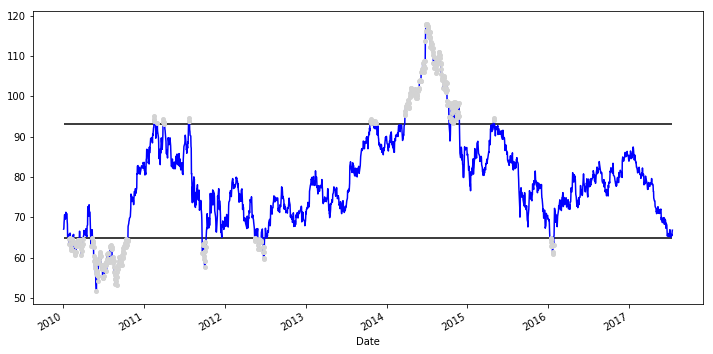

In [98]:
slb_close.plot(color = 'blue', figsize=(12,6))
slb_top_bottom_10.plot(marker = 'o', style='  ', ms = 4, color= 'lightgray')
xmin= criteria.index[0]
xmax= criteria.index[-1]

import matplotlib.pyplot as plt
plt.hlines(y=[lower_10, upper_10], xmin = xmin, xmax = xmax, color = 'black')

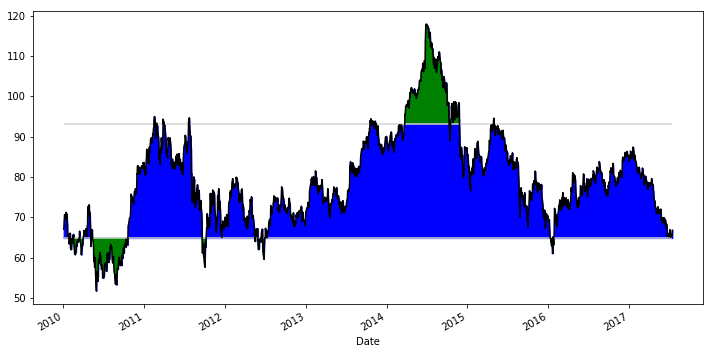

In [110]:
slb_close.plot(color='black', figsize=(12, 6))
plt.hlines(y=[lower_10, upper_10], xmin = xmin, xmax = xmax, color='lightgray') # 상위 10% 하위 10%에 선을 긋는다.
plt.fill_between(x=criteria.index, y1 =lower_10, y2=slb_close.values, color='blue') # 그래프 내부를 색칠한다.
plt.fill_between(x=criteria.index, y1 =lower_10, y2=slb_close.values, where = slb_close < lower_10, color='green') # 하위 10% 미만의 영역을 green으로 칠한다.
plt.fill_between(x=criteria.index, y1 =upper_10, y2=slb_close.values, where = slb_close > upper_10, color='green') # 상위 10% 초과의 영역을 green으로 칠한다.

### SQL WHERE 절 해석

In [112]:
employee = pd.read_csv('/Users/chosikc/Sites/PandasCookbook/employee.csv' )

In [113]:
employee.DEPARTMENT.value_counts().head()
# 필터링 된 각 열의 데이터를 확인

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [114]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int64

In [126]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 8000) & (employee.BASE_SALARY <= 120000)

In [129]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [130]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
55,55,Houston Police Department-HPD,Female,34757.0
61,61,Houston Fire Department (HFD),Female,96668.0
67,67,Houston Police Department-HPD,Female,66614.0
113,113,Houston Police Department-HPD,Female,66614.0
123,123,Houston Police Department-HPD,Female,43443.0


In [132]:
criteria_sal = employee.BASE_SALARY.between(8000, 120000)
criteria_sal.head()

0    False
1     True
2     True
3     True
4     True
Name: BASE_SALARY, dtype: bool

In [134]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


### 주식 시장 수익률의 정규성 검정

### query 메서드를 사용한 불리언 인덱싱의 가독성 개선

### where 메서드를 사용한 Series 보존

### DataFrame 행 마스크

### 불리언, 정수 위치, 레이블을 이용한 선택